In [860]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from itertools import product
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from pickle import dump

In [861]:
df=pd.read_csv("C:/Users/sanj/OneDrive/Documents/lr/online_retail.csv")

In [862]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [863]:
df.tail()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [864]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,541909.0,270954.000000,156435.797850,0.00,135477.00,270954.00,406431.00,541908.0
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [865]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [866]:
df.Description.unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [867]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [868]:
df.nunique()

index          541909
InvoiceNo       25900
StockCode        4070
Description      4223
Quantity          722
InvoiceDate     23260
UnitPrice        1630
CustomerID       4372
Country            38
dtype: int64

In [869]:
df.shape

(541909, 9)

In [870]:
df[df.duplicated()]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [871]:
print(f'there are {df.duplicated().sum()} duplicated values in dataset')

there are 0 duplicated values in dataset


In [872]:
df.isnull().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [873]:
#df['Quantity'] = df['Quantity'].apply(lambda x: 0 if x <= 0 else x)
df["Quantity"] = abs(df["Quantity"])
df["UnitPrice"] = abs(df["UnitPrice"])

In [874]:
df.dropna(subset=['Description'],inplace=True)

In [875]:
df.dropna(subset=['CustomerID'],inplace=True)

In [876]:
#df=df[df['Quantity']!=0]

In [877]:
df.isnull().sum()

index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [878]:
df.shape

(406829, 9)

In [879]:
df1=df.copy()

In [880]:
df1['Total_Sale']=df1['Quantity']*df1['UnitPrice']

In [881]:
df1=df1[df1['Total_Sale']!=0]

In [882]:
df1.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sale
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [883]:
round(df1.describe(),2)

,index,Quantity,UnitPrice,CustomerID,Total_Sale
count,406789.00,406789.00,406789.00,406789.00,406789.00
mean,278045.94,13.38,3.46,15287.80,23.41
std,152743.51,247.86,69.32,1713.57,427.46
min,0.00,1.00,0.00,12346.00,0.00
25%,147749.00,2.00,1.25,13954.00,4.68
50%,284430.00,5.00,1.95,15152.00,11.80
75%,409523.00,12.00,3.75,16791.00,19.80
max,541908.00,80995.00,38970.00,18287.00,168469.60


In [884]:
df1["InvoiceDate"] = pd.to_datetime(df1["InvoiceDate"])
df1.dtypes

index                   int64
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Total_Sale            float64
dtype: object

In [885]:
df1["Day"] = df1["InvoiceDate"].dt.day
df1["Month"] = df1["InvoiceDate"].dt.month
df1["Year"] = df1["InvoiceDate"].dt.year

In [886]:
df1.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sale,Day,Month,Year
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1,12,2010
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1,12,2010
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010


In [887]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return up_limit, low_limit

def replace_with_threshold(dataframe, variable):
    up_limit, low_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

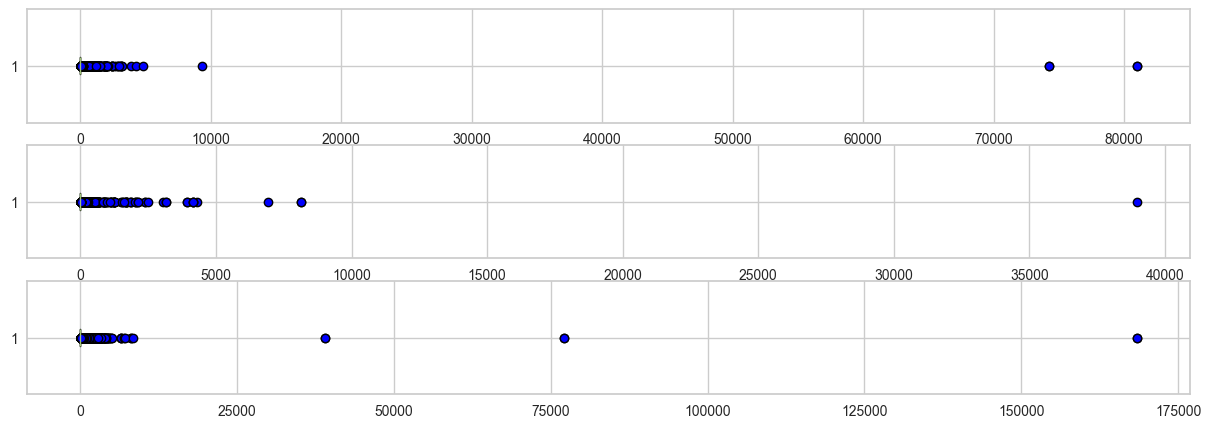

In [888]:
fig, axes = plt.subplots(3,1, figsize = (15,5))
col_list = ["Quantity","UnitPrice","Total_Sale"]
for i in range(0,3):
    axes[i].boxplot(df1[col_list[i]],flierprops = dict(marker = "o", markerfacecolor = "blue"), vert = 0)
plt.show()

In [889]:
replace_with_threshold(df1, "Quantity")
replace_with_threshold(df1, "UnitPrice")
replace_with_threshold(df1, "Total_Sale")

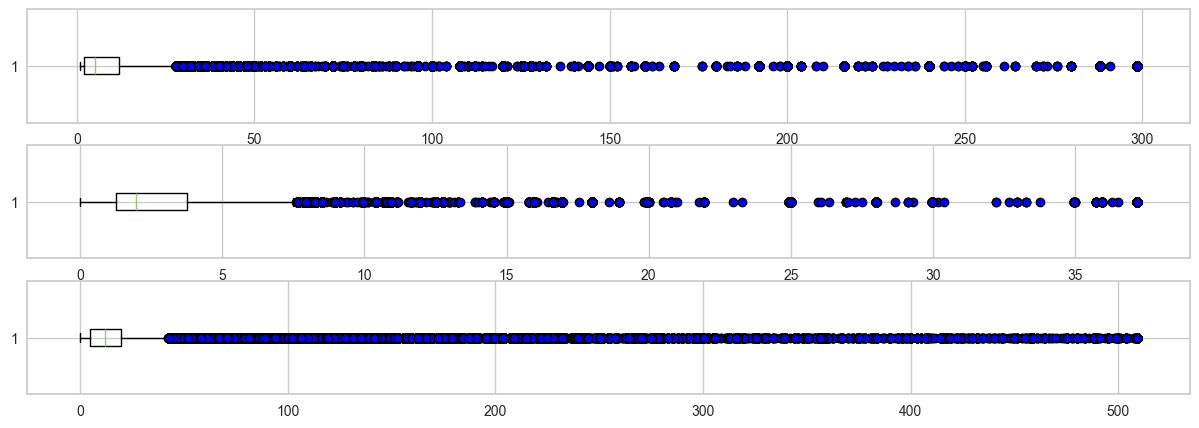

In [890]:
fig, axes = plt.subplots(3,1, figsize = (15,5))
col_list = ["Quantity","UnitPrice","Total_Sale"]
for i in range(0,3):
    axes[i].boxplot(df1[col_list[i]],flierprops = dict(marker = "o", markerfacecolor = "blue"), vert = 0)
plt.show()

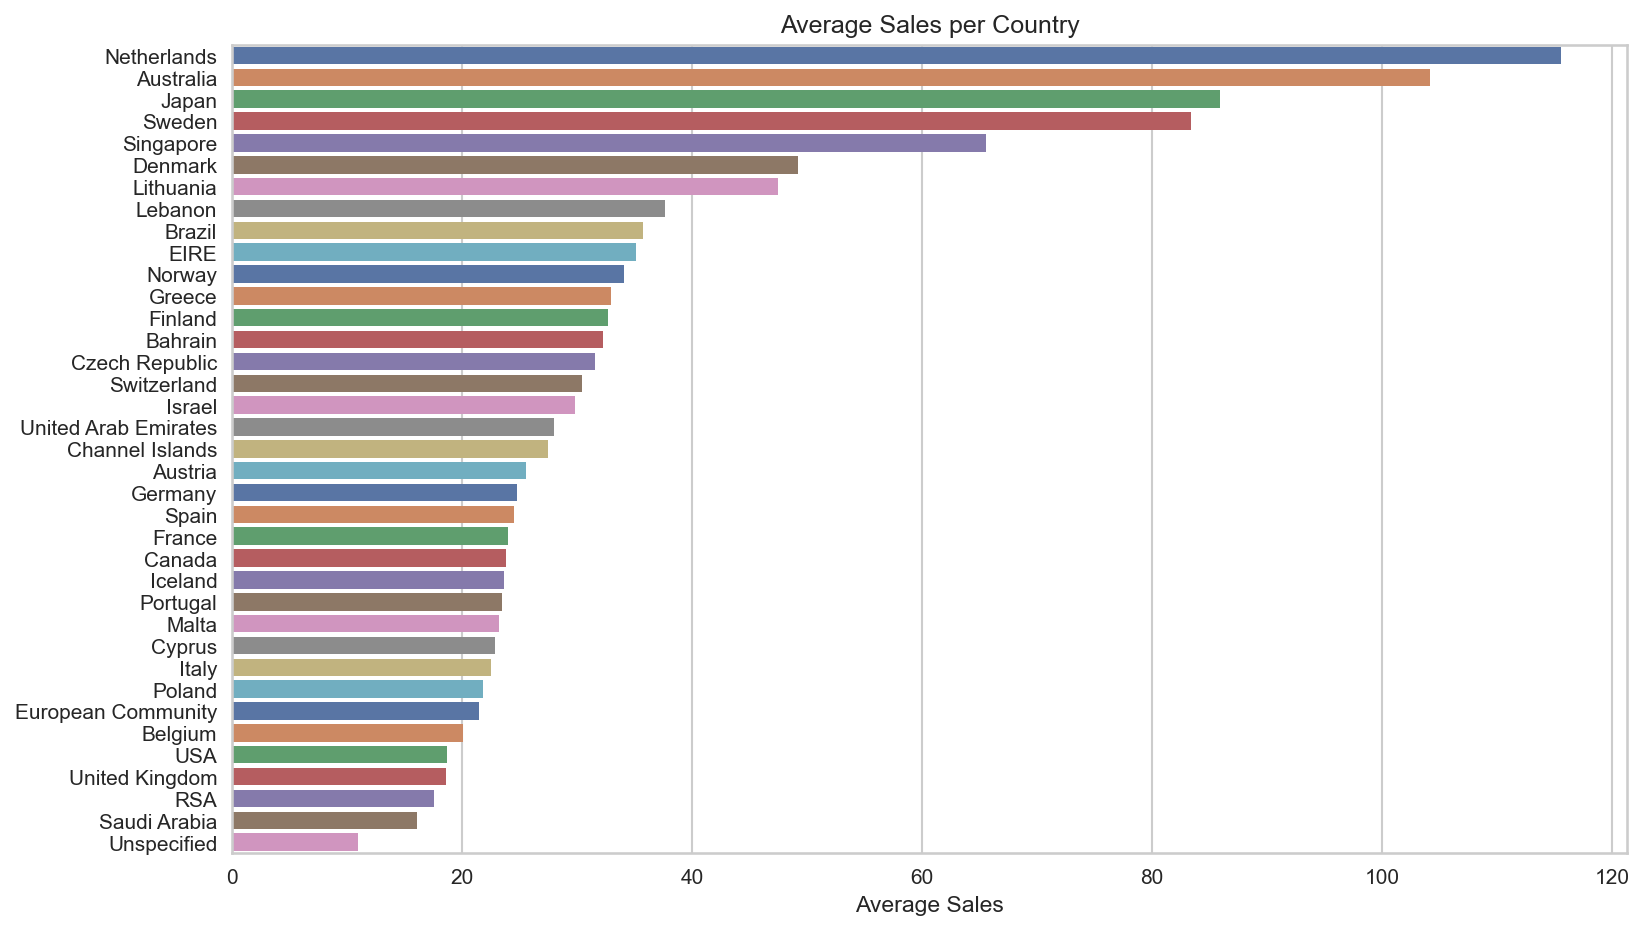

In [891]:
#Average Sales per Country
sales_per_country = df1.groupby("Country")["Total_Sale"].mean().sort_values(ascending=False)

plt.figure(figsize = (12, 7), dpi = 150)
sns.barplot(x = sales_per_country.values, y = sales_per_country.index,palette='deep')
plt.xlabel("Average Sales")
plt.ylabel("")
plt.title("Average Sales per Country");

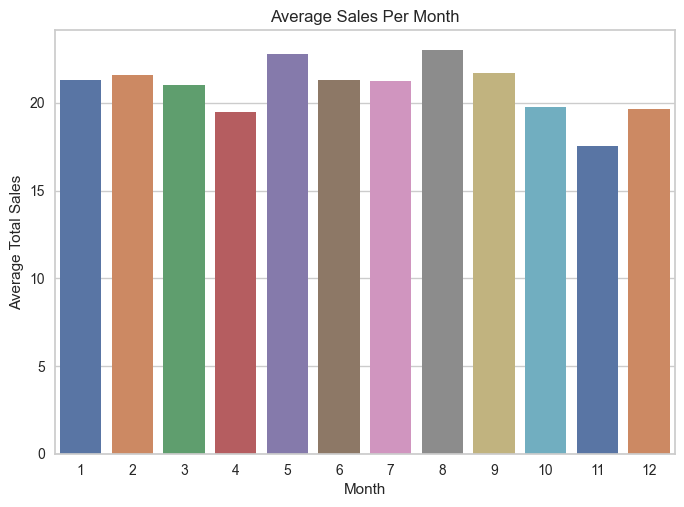

In [892]:
per_month = df1.groupby("Month")["Total_Sale"].mean()

plt.figure(dpi = 100)
sns.barplot(x = per_month.index, y = per_month.values,palette='deep')
plt.ylabel("Average Total Sales")
plt.title("Average Sales Per Month");

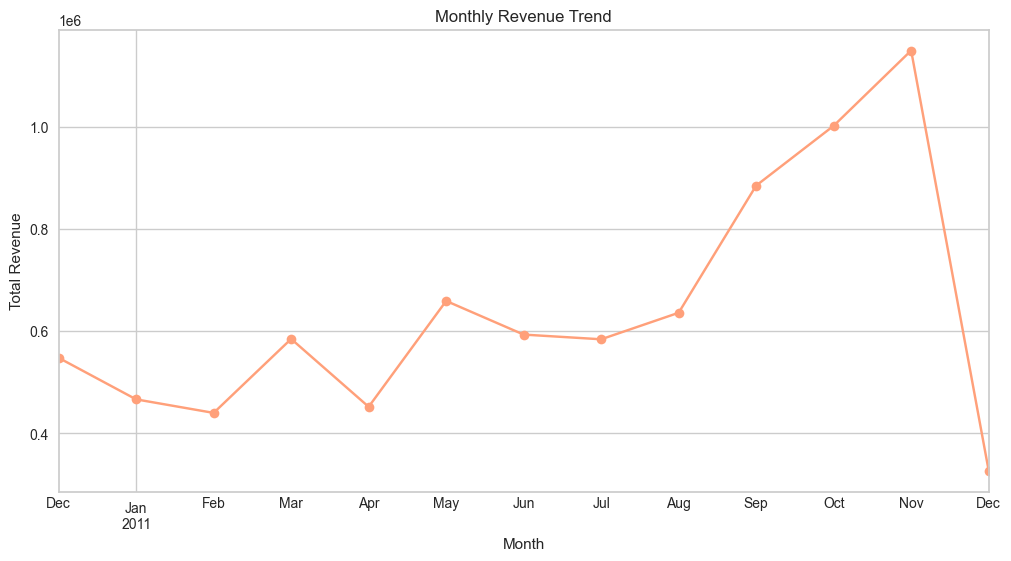

In [893]:
monthly_revenue = df1.resample('M', on='InvoiceDate')['Total_Sale'].sum()

# Visualization
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='lightsalmon')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

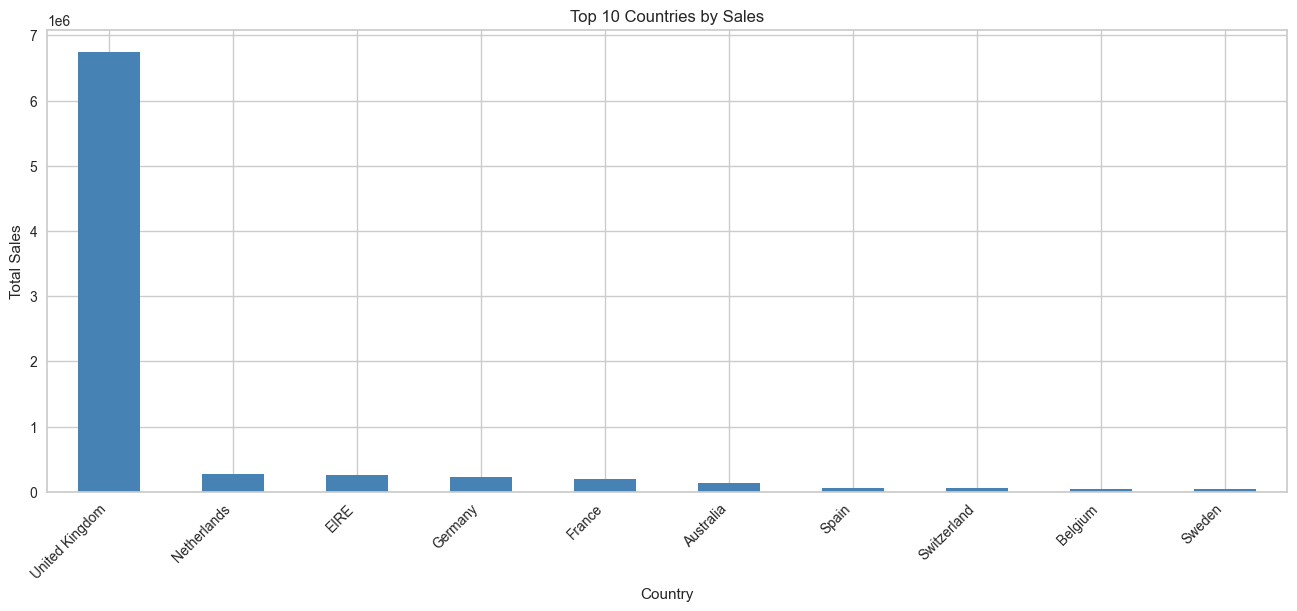

In [894]:
top_countries = df1.groupby('Country')['Total_Sale'].sum().sort_values(ascending=False).head(10)

# Visualization
plt.figure(figsize=(16, 6))
top_countries.plot(kind='bar', color='steelblue')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Sales')
plt.show()

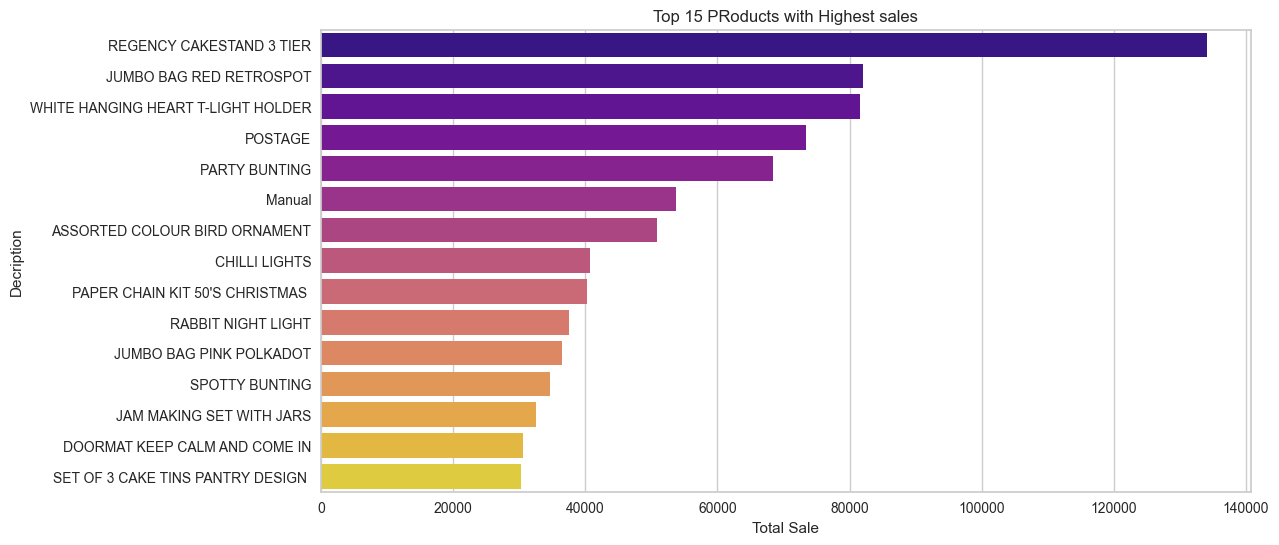

In [895]:
top_customers = df1.groupby('Description')['Total_Sale'].sum().sort_values(ascending=False).head(15)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(y = top_customers.index, x = top_customers.values,palette='plasma')
plt.title('Top 15 PRoducts with Highest sales')
plt.ylabel('Decription')
plt.xlabel('Total Sale')

plt.show()

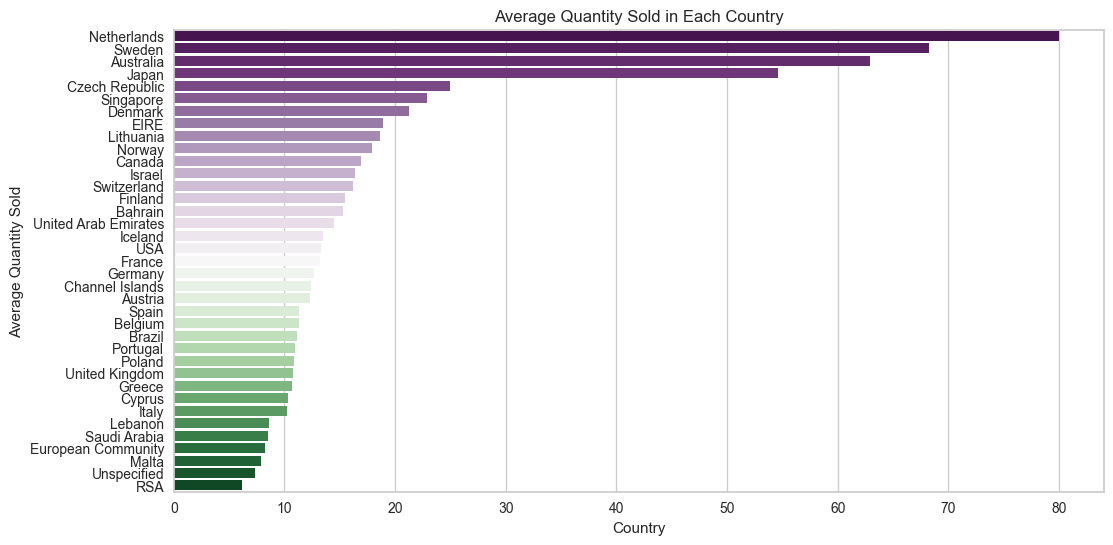

In [896]:
avg_quantity_by_country = df1.groupby('Country')['Quantity'].mean().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_quantity_by_country.values,y=avg_quantity_by_country.index,palette='PRGn')
plt.title('Average Quantity Sold in Each Country')
plt.xlabel('Country')
plt.ylabel('Average Quantity Sold')
plt.show()

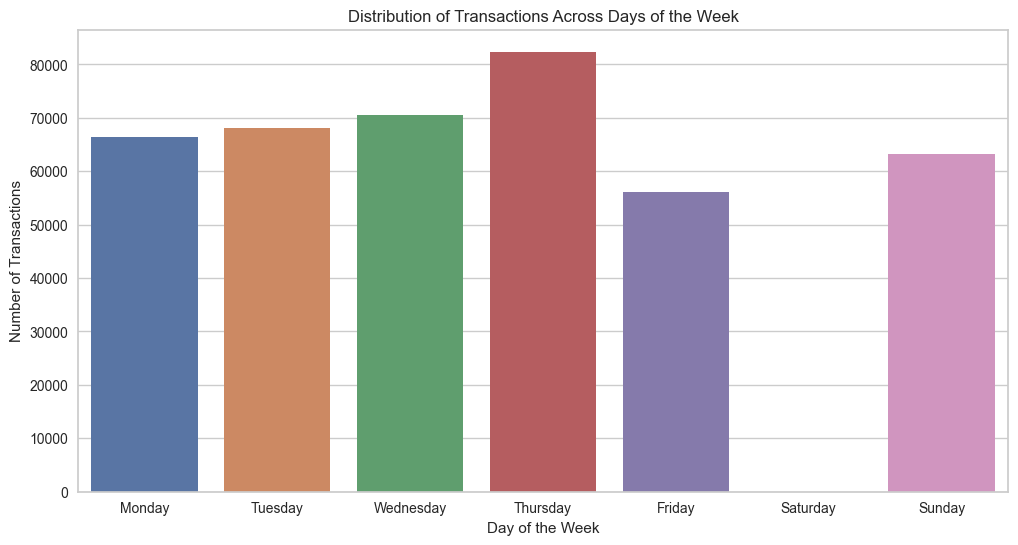

In [897]:
df1['DayOfWeek'] = df1['InvoiceDate'].dt.day_name()

# Visualization
plt.figure(figsize=(12, 6))
sns.countplot(x='DayOfWeek', data=df1, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='deep')
plt.title('Distribution of Transactions Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()

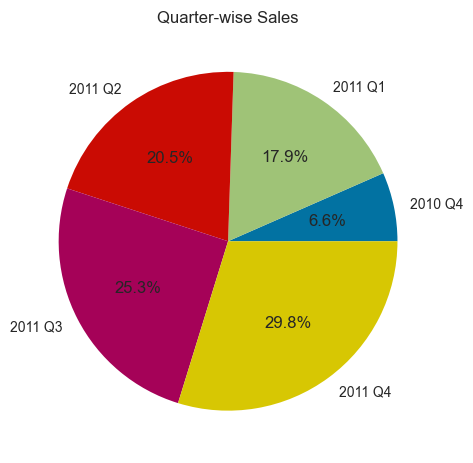

In [898]:
df1["Quarter"] = pd.PeriodIndex(df1["InvoiceDate"], freq= 'Q')
quarter_sales = df1.groupby("Quarter")["Total_Sale"].sum()

plt.figure(dpi = 100)
plt.pie(quarter_sales, labels = ["2010 Q4", "2011 Q1", "2011 Q2", "2011 Q3", "2011 Q4"], autopct = "%1.1f%%")
plt.title("Quarter-wise Sales");

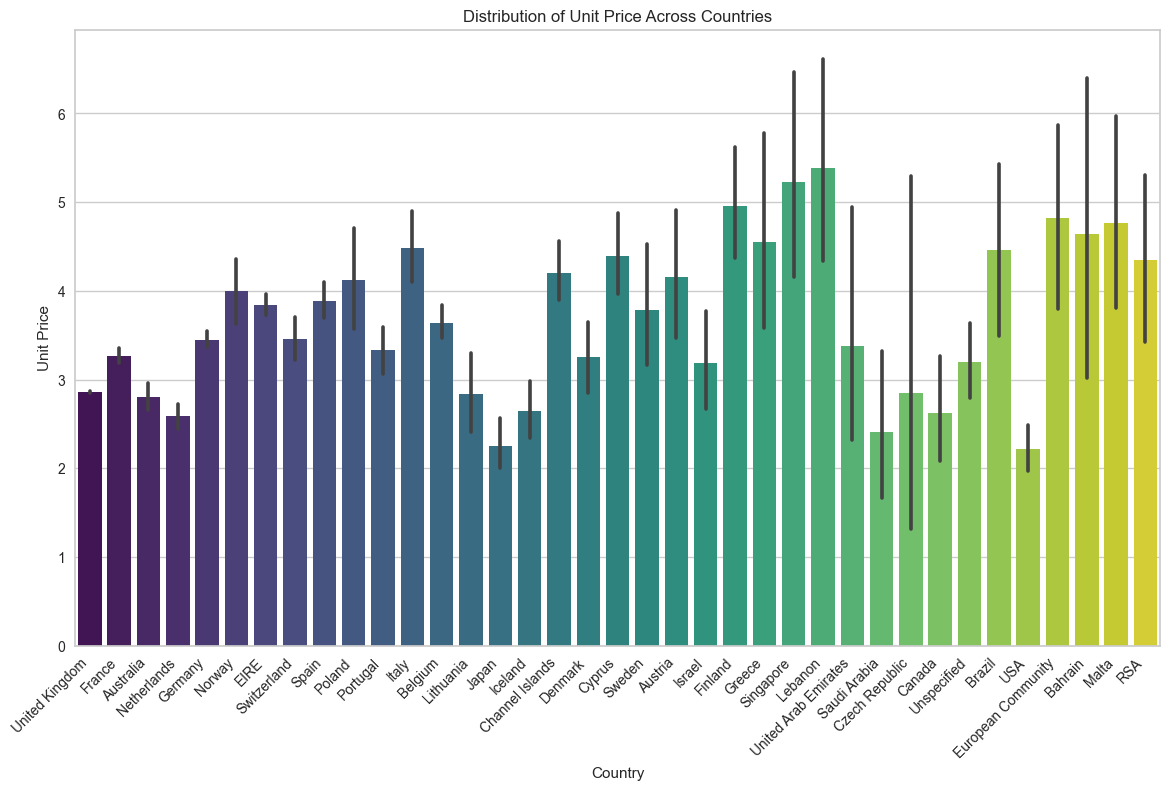

In [899]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='UnitPrice', data=df1, palette='viridis')
plt.title('Distribution of Unit Price Across Countries')
plt.xlabel('Country')
plt.ylabel('Unit Price')
plt.xticks(rotation=45, ha='right')
plt.show()


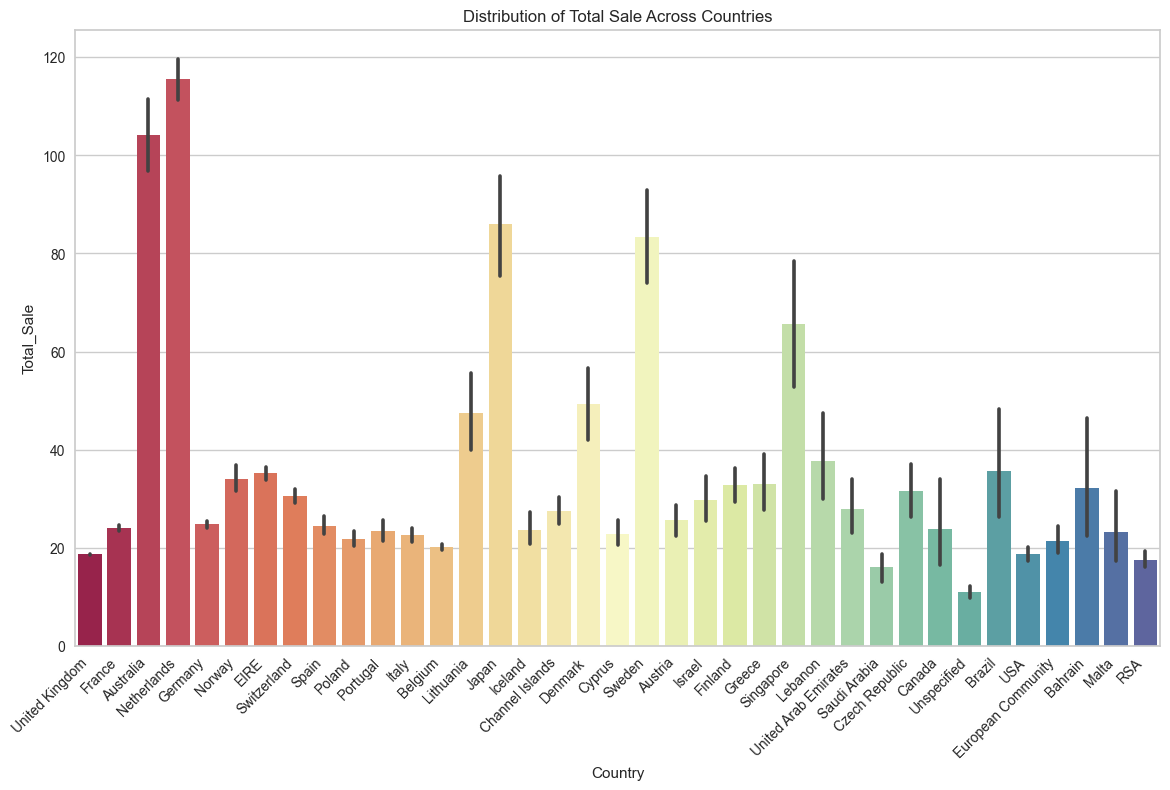

In [900]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Total_Sale', data=df1, palette='Spectral')
plt.title('Distribution of Total Sale Across Countries')
plt.xlabel('Country')
plt.ylabel('Total_Sale')
plt.xticks(rotation=45, ha='right')
plt.show()

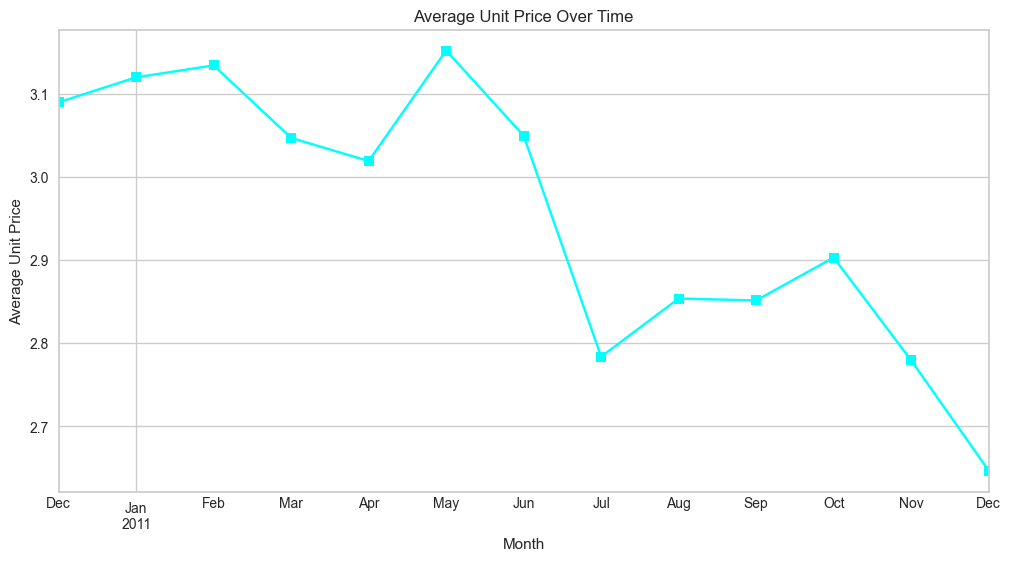

In [901]:
# Average unit price over time
avg_unit_price_over_time = df1.groupby(df1['InvoiceDate'].dt.to_period("M"))['UnitPrice'].mean()

# Visualization
plt.figure(figsize=(12, 6))
avg_unit_price_over_time.plot(kind='line', marker='s', color='aqua')
plt.title('Average Unit Price Over Time')
plt.xlabel('Month')
plt.ylabel('Average Unit Price')
plt.show()

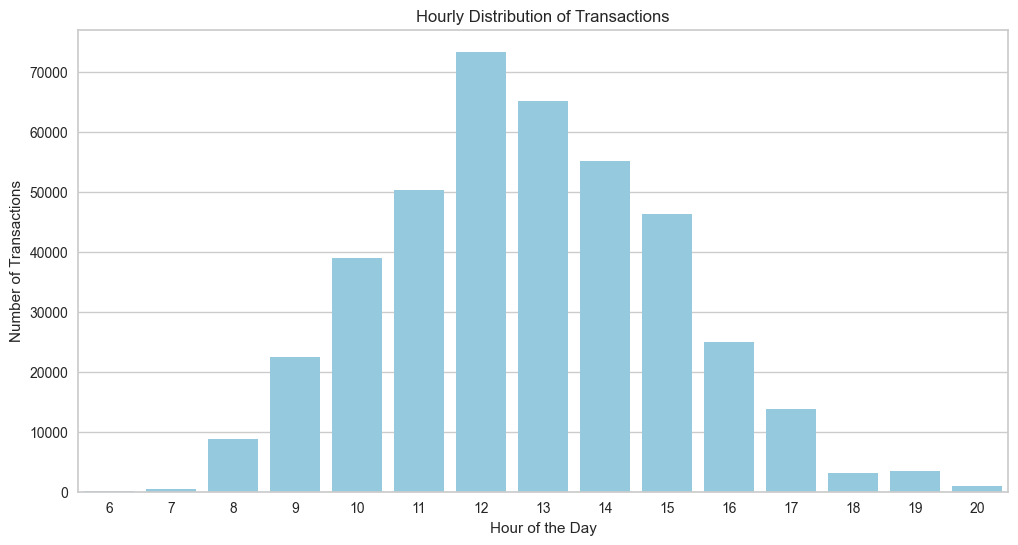

In [902]:
df1['HourOfDay'] = df1['InvoiceDate'].dt.hour

# Visualization
plt.figure(figsize=(12, 6))
sns.countplot(x='HourOfDay', data=df1, color='skyblue')
plt.title('Hourly Distribution of Transactions')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()

In [903]:
print("Max date :",df1["InvoiceDate"].max())
print("Min date :",df1["InvoiceDate"].min())

Max date : 2011-12-09 12:50:00
Min date : 2010-12-01 08:26:00


In [904]:
df1.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sale,Day,Month,Year,DayOfWeek,Quarter,HourOfDay
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1,12,2010,Wednesday,2010Q4,8
1,1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010,Wednesday,2010Q4,8
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1,12,2010,Wednesday,2010Q4,8
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010,Wednesday,2010Q4,8
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010,Wednesday,2010Q4,8


In [905]:
RFM = df1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (df1["InvoiceDate"].max() - x.max()).days, 
                                                 'InvoiceNo': lambda x: x.nunique(), 
                                                 "Total_Sale": lambda x: x.sum()})
                                
RFM['InvoiceDate'] = RFM['InvoiceDate'].astype(int)

#Renaming column names to Recency, Frequency and Monetary
RFM.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Total_Sale': 'Monetary'}, inplace=True)

In [906]:
RFM.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,1018.35
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


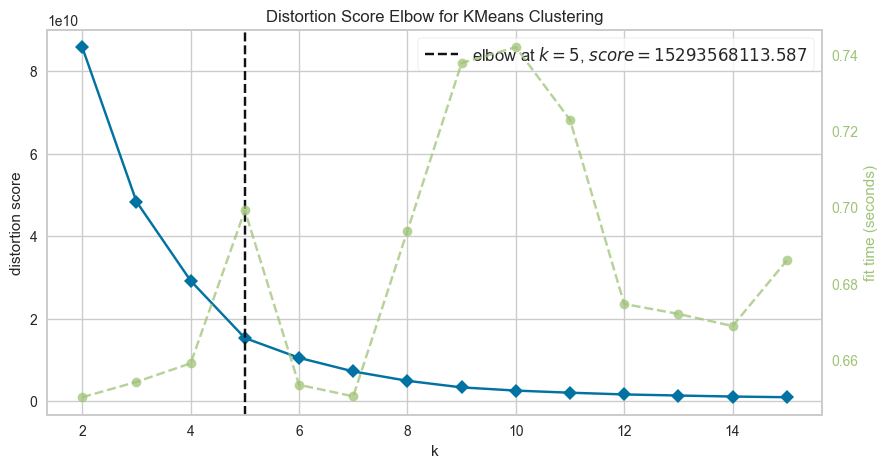

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [907]:
plt.figure(figsize=(10,5))
ax = plt.axes()
Elbow_M = KElbowVisualizer(KMeans(), k=15) 
Elbow_M.fit(RFM)
Elbow_M.show()



In [908]:
print("Therefore K = 5")

Therefore K = 5


In [909]:
kmeans = KMeans(n_clusters=5,max_iter=50)
kmeans.fit(RFM)

KMeans(max_iter=50, n_clusters=5)

In [910]:
RFM["Clusters"]=kmeans.labels_
RFM.head()

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346.0,325,2,1018.35,0
12347.0,1,7,4310.00,0
12348.0,74,4,1797.24,0
12349.0,18,1,1757.55,0
12350.0,309,1,334.40,0


In [911]:
RFM.tail()

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
18280.0,277,1,180.60,0
18281.0,180,1,80.82,0
18282.0,7,3,179.50,0
18283.0,3,16,2094.88,0
18287.0,42,3,1837.28,0


In [912]:
np.unique(RFM['Clusters'], return_counts=True)

(array([0, 1, 2, 3, 4]), array([4061,   24,    6,    1,  279], dtype=int64))

In [913]:
kmeans.cluster_centers_

array([[9.65278188e+01, 3.62383063e+00, 9.83402405e+02],
       [6.16666667e+00, 6.18333333e+01, 4.33361577e+04],
       [6.83333333e+00, 8.38333333e+01, 1.18481865e+05],
       [1.00000000e+00, 7.60000000e+01, 2.68097510e+05],
       [2.07158273e+01, 1.94352518e+01, 8.30765099e+03]])

In [914]:
def rfm_rel_labels(Clusters:str):
    rfm_list = ['Recency', 'Frequency', 'Monetary']
    fig, axs = plt.subplots(3, 1, figsize=(12, 19),facecolor='aliceblue')
    items = product(rfm_list, axs)
    for i, item in enumerate(items):
        # (i == 0) --> state 1: Recency and axis 0
        # (i == 4) --> state 5: Frequency and axis 1
        # (i == 8) --> state 9: Monetary and axis 2
        if (i == 0) or (i == 4) or (i == 8):
            item[1].scatter(x=[f'Cluster {clusterNum + 1}' if clusterNum != -1 else 'Outlier Cluster' for clusterNum in 
                              RFM.sort_values([Clusters])[Clusters].astype('int')],
                       y=RFM.sort_values([Clusters])[item[0]], c=RFM.sort_values([Clusters])[Clusters],marker="o",edgecolors='black')
            item[1].set_title(Clusters, size=14)
            item[1].set_xlabel('The Cluster Number')
            item[1].set_ylabel(item[0])
            if Clusters == 'DBSCAN_C':
                item[1].tick_params(axis='x', labelrotation=89)

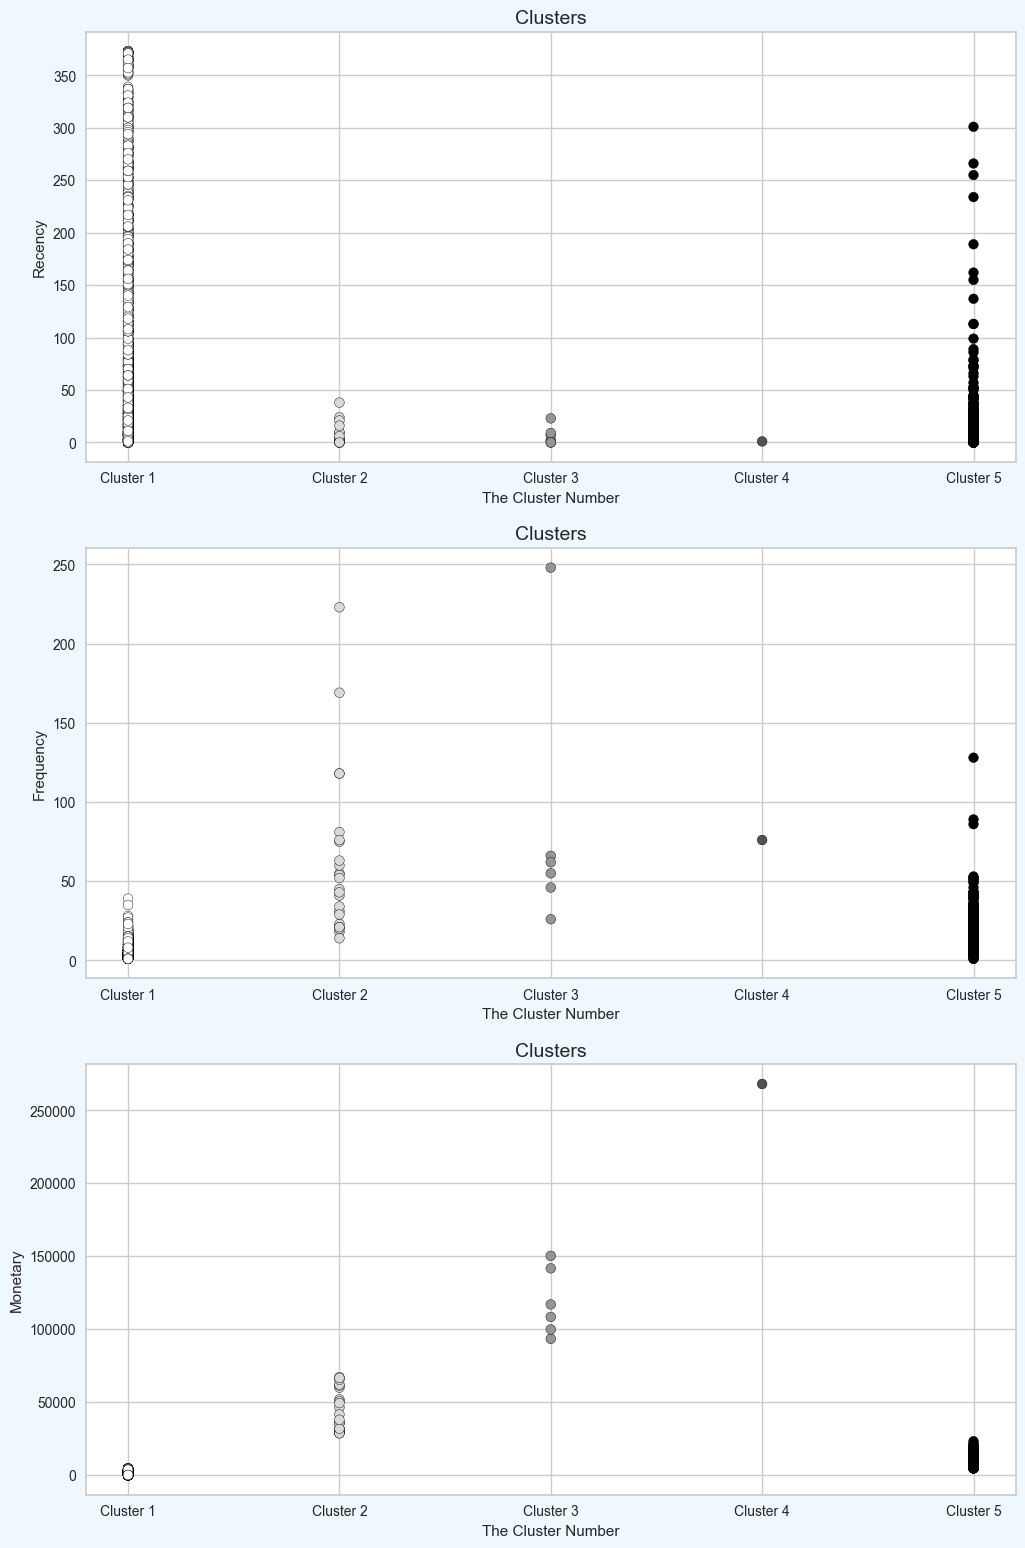

In [915]:
rfm_rel_labels('Clusters')

In [916]:
dbscan = DBSCAN(eps=.5, min_samples=4)
dbscan.fit(RFM)

DBSCAN(min_samples=4)

In [917]:
RFM['DBSCAN_C'] =dbscan.labels_
np.unique(RFM['DBSCAN_C'], return_counts=True)

(array([-1], dtype=int64), array([4371], dtype=int64))

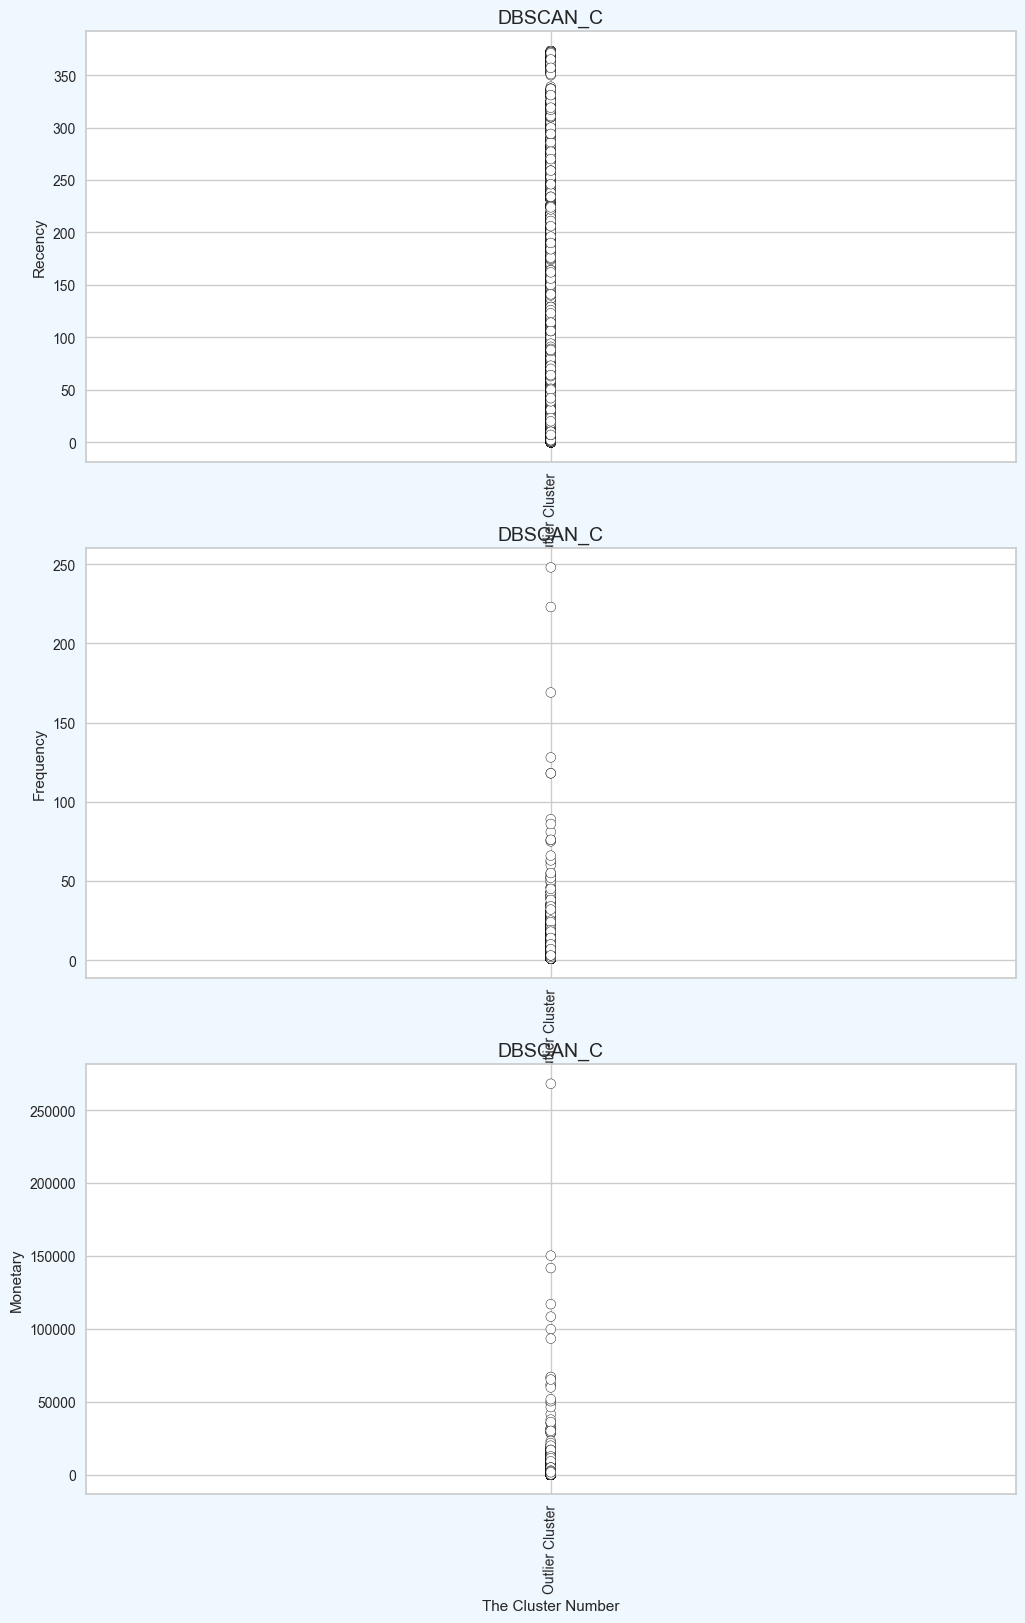

In [918]:
rfm_rel_labels('DBSCAN_C')

In [919]:
RFM[RFM["DBSCAN_C"] == -1][['Recency', 'Frequency', 'Monetary']].mean()

Recency        91.064974
Frequency       5.075726
Monetary     1904.178456
dtype: float64

In [920]:
RFM.head()

,Recency,Frequency,Monetary,Clusters,DBSCAN_C
CustomerID,,,,,
12346.0,325,2,1018.35,0,-1
12347.0,1,7,4310.00,0,-1
12348.0,74,4,1797.24,0,-1
12349.0,18,1,1757.55,0,-1
12350.0,309,1,334.40,0,-1


In [921]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4371 entries, 12346.0 to 18287.0
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4371 non-null   int32  
 1   Frequency  4371 non-null   int64  
 2   Monetary   4371 non-null   float64
 3   Clusters   4371 non-null   int32  
 4   DBSCAN_C   4371 non-null   int64  
dtypes: float64(1), int32(2), int64(2)
memory usage: 170.7 KB


In [922]:
RFM[RFM["DBSCAN_C"] == -1][['Recency', 'Frequency', 'Monetary']].mean()

Recency        91.064974
Frequency       5.075726
Monetary     1904.178456
dtype: float64

In [923]:
for i in range(0,5):
    print(f"Cluster {i}\n",(RFM[RFM["Clusters"] == i][['Recency','Frequency','Monetary']].mean()))

Cluster 0
 Recency       96.550111
Frequency      3.622261
Monetary     982.499426
dtype: float64
Cluster 1
 Recency          6.166667
Frequency       61.833333
Monetary     43336.157708
dtype: float64
Cluster 2
 Recency           6.833333
Frequency        83.833333
Monetary     118481.865000
dtype: float64
Cluster 3
 Recency           1.00
Frequency        76.00
Monetary     268097.51
dtype: float64
Cluster 4
 Recency        20.663082
Frequency      19.401434
Monetary     8294.542563
dtype: float64


In [924]:
print("Silhouette score :",silhouette_score(RFM, kmeans.labels_, metric='euclidean'))

Silhouette score : 0.8151288227450111
